# CM1: Covid Data Set

First, we do some preprocessing on the data.

References:
1. https://docs.python.org/3/library/datetime.html?highlight=fromisoformat#module-datetime
2. https://www.kite.com/python/answers/how-to-modify-all-the-values-in-a-pandas-dataframe-column-in-python
3. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('COVID_dataset.csv')

display(df.head())
display(df.count())

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,2020-03-30,2020-03-31,2020-03-31,2020-03-30,70s,MALE,OB,Stratford,Yes,43.368662,-81.001913,Fatal
1,2021-01-22,2021-01-24,2021-01-24,2021-01-23,50s,FEMALE,NO KNOWN EPI LINK,Newmarket,NaN,44.048023,-79.480239,Not Resolved
2,2020-03-24,2020-04-14,2020-04-14,2020-04-13,70s,FEMALE,OB,Toronto,Yes,43.656591,-79.379358,Resolved
3,2021-01-18,2021-01-21,2021-01-21,2021-01-18,<20,MALE,CC,Mississauga,NaN,43.647471,-79.708893,Not Resolved
4,2020-12-26,2020-12-28,2020-12-28,2020-12-26,60s,MALE,OB,Windsor,Yes,42.308796,-83.033670,Resolved


Accurate_Episode_Date      14860
Case_Reported_Date         14860
Test_Reported_Date         14657
Specimen_Date              14738
Age_Group                  14855
Client_Gender              14860
Case_AcquisitionInfo       14860
Reporting_PHU_City         14860
Outbreak_Related            5778
Reporting_PHU_Latitude     14860
Reporting_PHU_Longitude    14860
Outcome1                   14860
dtype: int64

We notice there is missing information. We will analyze each column to preprocess them accordingly.

### Outbreak_Related
This column has many NaN that should be replaced with 'No'. After that we will encode 'No' to 0 and 'Yes' to 1.

In [2]:
display('Before Preprocessing', df['Outbreak_Related'].unique())
df['Outbreak_Related'] = df['Outbreak_Related'].fillna('No')
df['Outbreak_Related'] = df['Outbreak_Related'].replace({'No':0, 'Yes':1})
display('After Preprocessing', df['Outbreak_Related'].unique())

'Before Preprocessing'

array(['Yes', nan], dtype=object)

'After Preprocessing'

array([1, 0], dtype=int64)

### Age_Group
We notice that 'Age_Group' has the following values:

'<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'. We will map these values into 1, 2, 3, 4, 5, 6, 7, 8, and 9, respectively. Note it is an ordinal feature since it is ordered by age. There are five NaN that we will drop later.

In [3]:
display('Before Preprocessing', df['Age_Group'].unique())
df['Age_Group'] = df['Age_Group'].replace({'<20':1, '20s':2, '30s':3, '40s':4, '50s':5, '60s':6, '70s':7, '80s':8, '90s':9})
df.dropna(subset = ['Age_Group'], inplace=True)
display('After Preprocessing', df['Age_Group'].unique())

'Before Preprocessing'

array(['70s', '50s', '<20', '60s', '20s', '80s', '40s', '90s', '30s', nan],
      dtype=object)

'After Preprocessing'

array([7., 5., 1., 6., 2., 8., 4., 9., 3.])

### Client_Gender
We notice that less than 1% of cases are gender diverse or unspeciefied. We remove those because they are outliers.

In [4]:
display(df['Client_Gender'].unique())
display(df.groupby('Client_Gender').count())
df = df[df['Client_Gender'] != 'GENDER DIVERSE']
df = df[df['Client_Gender'] != 'UNSPECIFIED']
df = pd.concat([df, pd.get_dummies(df['Client_Gender'], prefix='Client_Gender')], axis=1)
df.drop(['Client_Gender'], axis=1, inplace=True)

array(['MALE', 'FEMALE', 'UNSPECIFIED', 'GENDER DIVERSE'], dtype=object)

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
Client_Gender,,,,,,,,,,,
FEMALE,7559,7559,7457,7502,7559,7559,7559,7559,7559,7559,7559
GENDER DIVERSE,1,1,1,1,1,1,1,1,1,1,1
MALE,7192,7192,7100,7135,7192,7192,7192,7192,7192,7192,7192
UNSPECIFIED,103,103,98,99,103,103,103,103,103,103,103


### Case_AcquisitionInfo
There are only 5 'UNSPECIFIED EPI LINK' and those will be considered as outliers.

In [5]:
display(df.groupby('Case_AcquisitionInfo').count())
df = df[df['Case_AcquisitionInfo'] != 'UNSPECIFIED EPI LINK']
df = pd.concat([df, pd.get_dummies(df['Case_AcquisitionInfo'], prefix='Case_AcquisitionInfo')], axis=1)
df.drop(['Case_AcquisitionInfo'], axis=1, inplace=True)

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1,Client_Gender_FEMALE,Client_Gender_MALE
Case_AcquisitionInfo,,,,,,,,,,,,
CC,4095,4095,4041,4061,4095,4095,4095,4095,4095,4095,4095,4095
MISSING INFORMATION,2909,2909,2898,2898,2909,2909,2909,2909,2909,2909,2909,2909
NO KNOWN EPI LINK,2229,2229,2204,2218,2229,2229,2229,2229,2229,2229,2229,2229
OB,5324,5324,5227,5270,5324,5324,5324,5324,5324,5324,5324,5324
TRAVEL,189,189,182,185,189,189,189,189,189,189,189,189
UNSPECIFIED EPI LINK,5,5,5,5,5,5,5,5,5,5,5,5


### Reporting PHU City
We will do one hot encoding of cities.

In [6]:
display(df['Reporting_PHU_City'].unique())
# add new columns after doing one hot encoding
df = pd.concat([df, pd.get_dummies(df['Reporting_PHU_City'], prefix='City')], axis=1)
# now drop the original 'Reporting_PHU_City' column (you don't need it anymore)
df.drop(['Reporting_PHU_City'], axis=1, inplace=True)
display(df.head())

array(['Stratford', 'Newmarket', 'Toronto', 'Mississauga', 'Windsor',
       'Ottawa', 'Waterloo', 'Hamilton', 'Whitby', 'Oakville', 'Guelph',
       'Thorold', 'Barrie', 'Port Hope', 'St. Thomas', 'London',
       'Point Edward', 'Kingston', 'Brockville', 'Brantford', 'Cornwall',
       'Thunder Bay', 'Sudbury', 'Simcoe', 'Kenora', 'Chatham',
       'Owen Sound', 'Peterborough', 'Pembroke', 'Timmins', 'North Bay',
       'Belleville', 'Sault Ste. Marie', 'New Liskeard'], dtype=object)

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1,Client_Gender_FEMALE,...,City_St. Thomas,City_Stratford,City_Sudbury,City_Thorold,City_Thunder Bay,City_Timmins,City_Toronto,City_Waterloo,City_Whitby,City_Windsor
0,2020-03-30,2020-03-31,2020-03-31,2020-03-30,7.0,1,43.368662,-81.001913,Fatal,0,...,0,1,0,0,0,0,0,0,0,0
1,2021-01-22,2021-01-24,2021-01-24,2021-01-23,5.0,0,44.048023,-79.480239,Not Resolved,1,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-24,2020-04-14,2020-04-14,2020-04-13,7.0,1,43.656591,-79.379358,Resolved,1,...,0,0,0,0,0,0,1,0,0,0
3,2021-01-18,2021-01-21,2021-01-21,2021-01-18,1.0,0,43.647471,-79.708893,Not Resolved,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-12-26,2020-12-28,2020-12-28,2020-12-26,6.0,1,42.308796,-83.033670,Resolved,0,...,0,0,0,0,0,0,0,0,0,1


### Outcome1
We notice our classes are balanced, so we do not have to oversample or undersample any class.

In [7]:
display(df['Outcome1'].unique())
display(df.groupby('Outcome1').count())
df['Outcome1'] = df['Outcome1'].replace({'Resolved':1, 'Not Resolved':2, 'Fatal':3})
display(df['Outcome1'].unique())

array(['Fatal', 'Not Resolved', 'Resolved'], dtype=object)

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_FEMALE,Client_Gender_MALE,...,City_St. Thomas,City_Stratford,City_Sudbury,City_Thorold,City_Thunder Bay,City_Timmins,City_Toronto,City_Waterloo,City_Whitby,City_Windsor
Outcome1,,,,,,,,,,,,,,,,,,,,,
Fatal,4862,4862,4784,4831,4862,4862,4862,4862,4862,4862,...,4862,4862,4862,4862,4862,4862,4862,4862,4862,4862
Not Resolved,4959,4959,4894,4905,4959,4959,4959,4959,4959,4959,...,4959,4959,4959,4959,4959,4959,4959,4959,4959,4959
Resolved,4925,4925,4874,4896,4925,4925,4925,4925,4925,4925,...,4925,4925,4925,4925,4925,4925,4925,4925,4925,4925


array([3, 2, 1], dtype=int64)

### Dates and NaN
We now drop all rows with NaN and do an ordinal encoding on the dates.

In [8]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

import datetime

minDate = [df['Accurate_Episode_Date'].min(), df['Case_Reported_Date'].min(), df['Test_Reported_Date'].min(), df['Specimen_Date'].min()]
minDate = min(minDate)
minDate = datetime.datetime.strptime(minDate, "%Y-%m-%d")

display(df.head())

df['Accurate_Episode_Date'] = df['Accurate_Episode_Date'].apply(lambda x: (datetime.datetime.strptime(x, "%Y-%m-%d") - minDate).days)
df['Case_Reported_Date'] = df['Case_Reported_Date'].apply(lambda x: (datetime.datetime.strptime(x, "%Y-%m-%d") - minDate).days)
df['Test_Reported_Date'] = df['Test_Reported_Date'].apply(lambda x: (datetime.datetime.strptime(x, "%Y-%m-%d") - minDate).days)
df['Specimen_Date'] = df['Specimen_Date'].apply(lambda x: (datetime.datetime.strptime(x, "%Y-%m-%d") - minDate).days)

display(df.head())

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1,Client_Gender_FEMALE,...,City_St. Thomas,City_Stratford,City_Sudbury,City_Thorold,City_Thunder Bay,City_Timmins,City_Toronto,City_Waterloo,City_Whitby,City_Windsor
0,2020-03-30,2020-03-31,2020-03-31,2020-03-30,7.0,1,43.368662,-81.001913,3,0,...,0,1,0,0,0,0,0,0,0,0
1,2021-01-22,2021-01-24,2021-01-24,2021-01-23,5.0,0,44.048023,-79.480239,2,1,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-24,2020-04-14,2020-04-14,2020-04-13,7.0,1,43.656591,-79.379358,1,1,...,0,0,0,0,0,0,1,0,0,0
3,2021-01-18,2021-01-21,2021-01-21,2021-01-18,1.0,0,43.647471,-79.708893,2,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-12-26,2020-12-28,2020-12-28,2020-12-26,6.0,1,42.308796,-83.033670,1,0,...,0,0,0,0,0,0,0,0,0,1


,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1,Client_Gender_FEMALE,...,City_St. Thomas,City_Stratford,City_Sudbury,City_Thorold,City_Thunder Bay,City_Timmins,City_Toronto,City_Waterloo,City_Whitby,City_Windsor
0,80,81,81,80,7.0,1,43.368662,-81.001913,3,0,...,0,1,0,0,0,0,0,0,0,0
1,378,380,380,379,5.0,0,44.048023,-79.480239,2,1,...,0,0,0,0,0,0,0,0,0,0
2,74,95,95,94,7.0,1,43.656591,-79.379358,1,1,...,0,0,0,0,0,0,1,0,0,0
3,374,377,377,374,1.0,0,43.647471,-79.708893,2,0,...,0,0,0,0,0,0,0,0,0,0
4,351,353,353,351,6.0,1,42.308796,-83.033670,1,0,...,0,0,0,0,0,0,0,0,0,1


# Splitting Data into Train, Validation, and Test Sets

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

seed = 0

X = df.drop(['Outcome1'], axis=1)
y = df['Outcome1']
y = to_categorical(y)
y = y[:,1:4]

X_train, X_aux, y_train, y_aux = train_test_split(X, y, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, test_size=0.5, random_state=seed)

display('Shape of train data set', X_train.shape, 'Shape of the target train data set', y_train.shape)
display('Shape of validation data set', X_val.shape, 'Shape of the target validation data set', y_val.shape)
display('Shape of test data set', X_test.shape, 'Shape of the target test data set', y_test.shape)

'Shape of train data set'

(11636, 49)

'Shape of the target train data set'

(11636, 3)

'Shape of validation data set'

(1455, 49)

'Shape of the target validation data set'

(1455, 3)

'Shape of test data set'

(1455, 49)

'Shape of the target test data set'

(1455, 3)

# Creating a Deep Neural Network

References:
1. https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
2. https://www.kaggle.com/bulentsiyah/keras-deep-learning-to-solve-titanic
3. https://www.kaggle.com/bulkedge/simple-dnn-for-titanic

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Sequential
model1 = Sequential()

# 1st hidden layer
model1.add(Dense(512, input_shape=(49, ), activation='relu'))
model1.add(Dropout(0.2))

# 2nd hidden layer
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.2))

# 3rd hidden layer
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.2))

# 4th hidden layer
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.2))

# 5th hidden layer
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.2))

# output layer
# model1.add(Dense(3, activation='softmax'))
model1.add(Dense(3, activation='sigmoid'))

opt1 = Adam(learning_rate = 4e-4)

# compile
model1.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               25600     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6

In [11]:
import time

startModel1 = time.time()
history1 = model1.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_val, y_val))
endModel1 = time.time()

Epoch 1/50
364/364 [==============================] - 3s 6ms/step - loss: 3.3318 - accuracy: 0.3978 - val_loss: 0.9615 - val_accuracy: 0.3918
Epoch 2/50
364/364 [==============================] - 1s 4ms/step - loss: 1.0125 - accuracy: 0.4853 - val_loss: 0.8715 - val_accuracy: 0.5773
Epoch 3/50
364/364 [==============================] - 1s 3ms/step - loss: 0.9041 - accuracy: 0.5470 - val_loss: 0.7493 - val_accuracy: 0.6227
Epoch 4/50
364/364 [==============================] - 2s 4ms/step - loss: 0.8171 - accuracy: 0.5924 - val_loss: 0.6816 - val_accuracy: 0.6742
Epoch 5/50
364/364 [==============================] - 2s 5ms/step - loss: 0.7141 - accuracy: 0.6374 - val_loss: 0.6692 - val_accuracy: 0.6866
Epoch 6/50
364/364 [==============================] - 2s 4ms/step - loss: 0.6715 - accuracy: 0.6676 - val_loss: 0.5862 - val_accuracy: 0.7347
Epoch 7/50
364/364 [==============================] - 2s 5ms/step - loss: 0.6142 - accuracy: 0.7193 - val_loss: 0.3871 - val_accuracy: 0.8564
Epoch 

### Model 2

In [12]:
# Sequential
model2 = Sequential()

# 1st hidden layer
model2.add(Dense(128, input_shape=(49, ), activation='relu'))
model2.add(Dropout(0.2))

# 2nd hidden layer
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))

# output layer
# model2.add(Dense(3, activation='softmax'))
model2.add(Dense(3, activation='sigmoid'))

opt2 = Adam(learning_rate = 4e-4)

# compile
model2.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               6400      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 387       
Total params: 23,299
Trainable params: 23,299
Non-trainable params: 0
_________________________________________________________________


In [13]:
import time

startModel2 = time.time()
history2 = model2.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_val, y_val))
endModel2 = time.time()

Epoch 1/50
364/364 [==============================] - 1s 2ms/step - loss: 11.8298 - accuracy: 0.4239 - val_loss: 0.9749 - val_accuracy: 0.4564
Epoch 2/50
364/364 [==============================] - 0s 1ms/step - loss: 1.0368 - accuracy: 0.5078 - val_loss: 0.8946 - val_accuracy: 0.5732
Epoch 3/50
364/364 [==============================] - 0s 1ms/step - loss: 0.9507 - accuracy: 0.5282 - val_loss: 0.8030 - val_accuracy: 0.6330
Epoch 4/50
364/364 [==============================] - 0s 1ms/step - loss: 0.8746 - accuracy: 0.5844 - val_loss: 0.7510 - val_accuracy: 0.6426
Epoch 5/50
364/364 [==============================] - 0s 1ms/step - loss: 0.8106 - accuracy: 0.6142 - val_loss: 0.6655 - val_accuracy: 0.6942
Epoch 6/50
364/364 [==============================] - 0s 1ms/step - loss: 0.7223 - accuracy: 0.6453 - val_loss: 0.6297 - val_accuracy: 0.7120
Epoch 7/50
364/364 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.6786 - val_loss: 0.5375 - val_accuracy: 0.7718
Epoch

# CM2: Model Plots

References:
1. https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
2. https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/

### Model 1

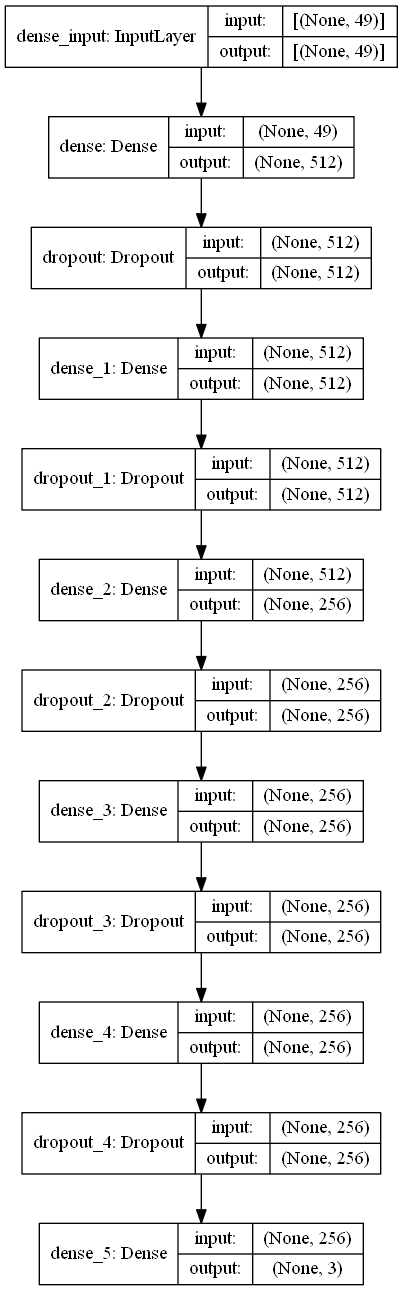

In [14]:
tf.keras.utils.plot_model(model1, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

Model 1 has 5 dense layers that use RELU as activation function and dropout of 20% of the nodes. If the dropout is lower or withdrawn the accuracy of the model decreases. The final layer uses sigmoid function as activation function (we tried tanh and softmax, but the highest accuracy is with sigmoid). The optimizer used is Adam with a learning rate of 4e-4. When we change the learning rate we notice that both the accuracy and loss plots become unstable or do not have a smooth behavior.

### Model 2

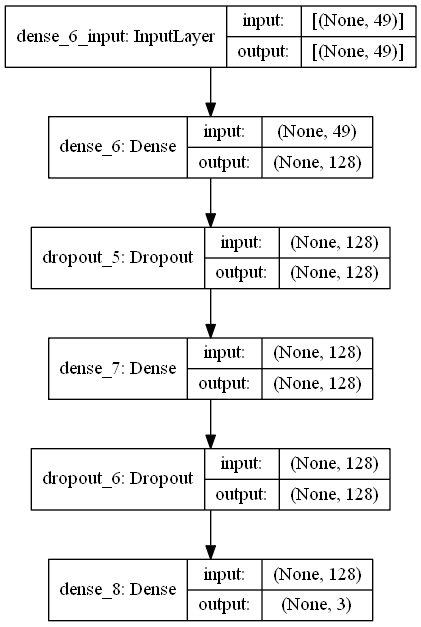

In [15]:
tf.keras.utils.plot_model(model2, to_file='model3_plot.png', show_shapes=True, show_layer_names=True)

As a second approach we tried a very shallow architecture, with just 2 dense layers with 128 nodes, RELU activation function, and dropout of 20%. It is very interesting to compare a deeper model with a more shallow model to see if the complexity of the problem actually requires a deep neural network model.

# CM3: Result Analysis
### Model 1

In [16]:
elapsedTimeModel1 = endModel1 - startModel1

display('The elapsed time to train Model 1 [seconds]', elapsedTimeModel1)

'The elapsed time to train Model 1 [seconds]'

82.29707455635071

In [17]:
import time

runStartModel1 = time.time()
_, acc1 = model1.evaluate(X_test, y_test, verbose=0)
display(acc1 * 100.0)
runEndModel1 = time.time()
display('Run Time of Model 1', runEndModel1 - runStartModel1)

86.8728518486023

'Run Time of Model 1'

0.09773874282836914

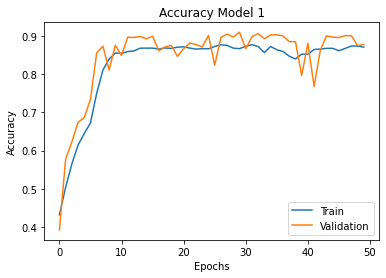

In [18]:
plt.figure()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy Model 1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

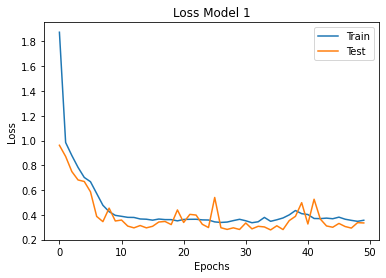

In [19]:
plt.figure()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

1. Learning rate: we can tell by the noise in the loss and accuracy plots that the learning rate we chose is a little high because we see noise. It is not enough noise that forces us to decrease the learning rate.
2. By comparing the accuracy of the model on the training, validation and test sets we get 87%, 91%, and 89%, respectively. This indicates that we are not overfitting or underfitting. We will do some deeper analysis next.
3. If we notice both the loss and accuracy plots, the validation accuracy reached a plateau, which means that the epochs chosen are sufficient.

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

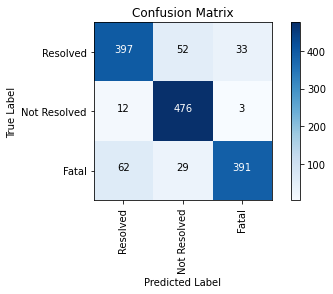

In [21]:
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred_model1 = model1.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes_model1 = np.argmax(Y_pred_model1, axis=1) 
# Convert validation observations to one hot vectors
Y_true_model1 = np.argmax(y_test, axis=1) 
# compute the confusion matrix
confusion_mtx_model1 = confusion_matrix(Y_true_model1, Y_pred_classes_model1) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx_model1, classes = ['Resolved', 'Not Resolved', 'Fatal'])

From the confussion matrix we notice that there is very little mistakes between 'Resolved' and 'Not Resolved', and 'Not Resolved' and 'Fatal'. The largest mistake is between labels 'Resolved' and 'Fatal'. Nevertheless, the model works very well on the data.

### Model 2

In [22]:
elapsedTimeModel2 = endModel2 - startModel2

display('The elapsed time to train Model 2 [seconds]', elapsedTimeModel2)

'The elapsed time to train Model 2 [seconds]'

23.272922039031982

In [23]:
import time

runStartModel2 = time.time()
_, acc2 = model2.evaluate(X_test, y_test, verbose=0)
display('Accuracy of Test Set of Model 2', acc2 * 100.0)
runEndModel2 = time.time()
display('Run Time of Model 2', runEndModel2 - runStartModel2)

'Accuracy of Test Set of Model 2'

82.19931125640869

'Run Time of Model 2'

0.06895995140075684

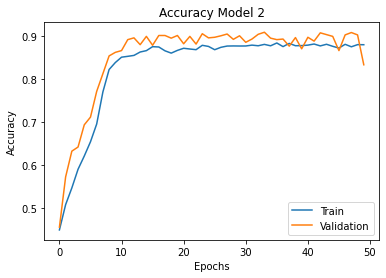

In [24]:
plt.figure()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

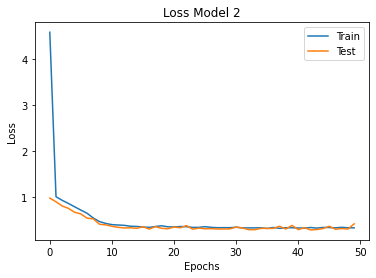

In [25]:
plt.figure()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])

1. Learning rate: we can tell by the noise in the loss and accuracy plots that the learning rate we chose is a little high because we see noise. It is not enough noise that forces us to decrease the learning rate.
2. By comparing the accuracy of the model on the training, validation and test sets we get 88%, 91%, and 90%, respectively. This indicates that we are not overfitting or underfitting. We will do some deeper analysis next.
3. If we notice both the loss and accuracy plots, the validation accuracy reached a plateau, which means that the epochs chosen are sufficient.

Comparing with model 1 we notice that we reach very similar results with a much shallower model. Which means that a simple model trained in 90 seconds is good enough to obtain 90% accuracy. Also, the evaluation time is almost the same for both models.

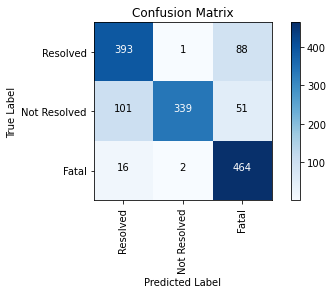

In [26]:
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred_model2 = model2.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes_model2 = np.argmax(Y_pred_model2, axis=1) 
# Convert validation observations to one hot vectors
Y_true_model2 = np.argmax(y_test, axis=1) 
# compute the confusion matrix
confusion_mtx_model2 = confusion_matrix(Y_true_model2, Y_pred_classes_model2)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx_model2, classes = ['Resolved', 'Not Resolved', 'Fatal'])

From the confussion matrix we notice that there is very little mistakes between 'Resolved' and 'Not Resolved', and 'Not Resolved' and 'Fatal'. The largest mistake is between labels 'Resolved' and 'Fatal'. Nevertheless, the model works very well on the data. These are very similar to the ones obtained in model 1.

# Kaggle

Reference:
1. https://www.edureka.co/community/51168/pandas-fillna-with-another-column

In [27]:
dfK = pd.read_csv('COVID_dataset_Kaggle.csv')

idK = dfK['id']
dfK.drop(['id'], axis=1, inplace=True)
display(dfK.head())

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,2020-07-03,2020-07-06,2020-07-06,2020-07-05,30s,MALE,CC,Mississauga,NaN,43.647471,-79.708893
1,2021-01-05,2021-01-13,2021-01-13,2021-01-13,80s,FEMALE,NO KNOWN EPI LINK,Peterborough,NaN,44.301632,-78.321347
2,2021-01-02,2021-01-07,2021-01-07,2021-01-06,60s,MALE,CC,Toronto,NaN,43.656591,-79.379358
3,2020-12-04,2020-12-05,2020-12-05,2020-12-04,70s,FEMALE,OB,Hamilton,Yes,43.257631,-79.871341
4,2021-01-17,2021-01-19,2021-01-19,2021-01-17,40s,MALE,MISSING INFORMATION,Toronto,NaN,43.656591,-79.379358


In [28]:
dfK['Outbreak_Related'] = dfK['Outbreak_Related'].fillna('No')
dfK['Outbreak_Related'] = dfK['Outbreak_Related'].replace({'No':0, 'Yes':1})

In [29]:
display(dfK.isna().sum())
dfK['Test_Reported_Date'] = dfK['Test_Reported_Date'].fillna(dfK['Case_Reported_Date'])
dfK['Specimen_Date'] = dfK['Specimen_Date'].fillna(dfK['Case_Reported_Date'])
display(dfK.isna().sum())

Accurate_Episode_Date       0
Case_Reported_Date          0
Test_Reported_Date         50
Specimen_Date              30
Age_Group                   0
Client_Gender               0
Case_AcquisitionInfo        0
Reporting_PHU_City          0
Outbreak_Related            0
Reporting_PHU_Latitude      0
Reporting_PHU_Longitude     0
dtype: int64

Accurate_Episode_Date      0
Case_Reported_Date         0
Test_Reported_Date         0
Specimen_Date              0
Age_Group                  0
Client_Gender              0
Case_AcquisitionInfo       0
Reporting_PHU_City         0
Outbreak_Related           0
Reporting_PHU_Latitude     0
Reporting_PHU_Longitude    0
dtype: int64

In [30]:
dfK['Age_Group'] = dfK['Age_Group'].replace({'<20':1, '20s':2, '30s':3, '40s':4, '50s':5, '60s':6, '70s':7, '80s':8, '90s':9})

In [31]:
display(dfK['Client_Gender'].unique())
display(dfK.groupby('Client_Gender').count())
dfK['Client_Gender'] = dfK['Client_Gender'].replace({'UNSPECIFIED':'MALE'})
dfK = pd.concat([dfK, pd.get_dummies(dfK['Client_Gender'], prefix='Client_Gender')], axis=1)
dfK.drop(['Client_Gender'], axis=1, inplace=True)
display(dfK.head())

array(['MALE', 'FEMALE', 'UNSPECIFIED'], dtype=object)

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude
Client_Gender,,,,,,,,,,
FEMALE,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883
MALE,1796,1796,1796,1796,1796,1796,1796,1796,1796,1796
UNSPECIFIED,25,25,25,25,25,25,25,25,25,25


,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_FEMALE,Client_Gender_MALE
0,2020-07-03,2020-07-06,2020-07-06,2020-07-05,3,CC,Mississauga,0,43.647471,-79.708893,0,1
1,2021-01-05,2021-01-13,2021-01-13,2021-01-13,8,NO KNOWN EPI LINK,Peterborough,0,44.301632,-78.321347,1,0
2,2021-01-02,2021-01-07,2021-01-07,2021-01-06,6,CC,Toronto,0,43.656591,-79.379358,0,1
3,2020-12-04,2020-12-05,2020-12-05,2020-12-04,7,OB,Hamilton,1,43.257631,-79.871341,1,0
4,2021-01-17,2021-01-19,2021-01-19,2021-01-17,4,MISSING INFORMATION,Toronto,0,43.656591,-79.379358,0,1


In [32]:
display(dfK.groupby('Case_AcquisitionInfo').count())
dfK['Case_AcquisitionInfo'] = dfK['Case_AcquisitionInfo'].replace({'UNSPECIFIED EPI LINK':'MISSING INFORMATION'})
dfK = pd.concat([dfK, pd.get_dummies(dfK['Case_AcquisitionInfo'], prefix='Case_AcquisitionInfo')], axis=1)
dfK.drop(['Case_AcquisitionInfo'], axis=1, inplace=True)

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_FEMALE,Client_Gender_MALE
Case_AcquisitionInfo,,,,,,,,,,,
CC,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007
MISSING INFORMATION,731,731,731,731,731,731,731,731,731,731,731
NO KNOWN EPI LINK,547,547,547,547,547,547,547,547,547,547,547
OB,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367
TRAVEL,51,51,51,51,51,51,51,51,51,51,51
UNSPECIFIED EPI LINK,1,1,1,1,1,1,1,1,1,1,1


In [33]:
display(dfK['Reporting_PHU_City'].unique())
# add new columns after doing one hot encoding
dfK = pd.concat([dfK, pd.get_dummies(dfK['Reporting_PHU_City'], prefix='City')], axis=1)
# now drop the original 'Reporting_PHU_City' column (you don't need it anymore)
dfK.drop(['Reporting_PHU_City'], axis=1, inplace=True)
display(dfK.head())

array(['Mississauga', 'Peterborough', 'Toronto', 'Hamilton', 'Windsor',
       'Barrie', 'Newmarket', 'Waterloo', 'Whitby', 'London', 'Thorold',
       'Port Hope', 'Oakville', 'Brantford', 'St. Thomas', 'Guelph',
       'Brockville', 'Point Edward', 'Ottawa', 'Cornwall', 'Sudbury',
       'Simcoe', 'Stratford', 'Kingston', 'Belleville', 'Timmins',
       'Thunder Bay', 'Chatham', 'Pembroke', 'Owen Sound', 'Kenora'],
      dtype=object)

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_FEMALE,Client_Gender_MALE,...,City_St. Thomas,City_Stratford,City_Sudbury,City_Thorold,City_Thunder Bay,City_Timmins,City_Toronto,City_Waterloo,City_Whitby,City_Windsor
0,2020-07-03,2020-07-06,2020-07-06,2020-07-05,3,0,43.647471,-79.708893,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-05,2021-01-13,2021-01-13,2021-01-13,8,0,44.301632,-78.321347,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-02,2021-01-07,2021-01-07,2021-01-06,6,0,43.656591,-79.379358,0,1,...,0,0,0,0,0,0,1,0,0,0
3,2020-12-04,2020-12-05,2020-12-05,2020-12-04,7,1,43.257631,-79.871341,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-17,2021-01-19,2021-01-19,2021-01-17,4,0,43.656591,-79.379358,0,1,...,0,0,0,0,0,0,1,0,0,0


In [34]:
display(dfK.head())

dfK['Accurate_Episode_Date'] = dfK['Accurate_Episode_Date'].apply(lambda x: (datetime.datetime.strptime(x, "%Y-%m-%d") - minDate).days)
dfK['Case_Reported_Date'] = dfK['Case_Reported_Date'].apply(lambda x: (datetime.datetime.strptime(x, "%Y-%m-%d") - minDate).days)
dfK['Test_Reported_Date'] = dfK['Test_Reported_Date'].apply(lambda x: (datetime.datetime.strptime(x, "%Y-%m-%d") - minDate).days)
dfK['Specimen_Date'] = dfK['Specimen_Date'].apply(lambda x: (datetime.datetime.strptime(x, "%Y-%m-%d") - minDate).days)

display(dfK.head())

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_FEMALE,Client_Gender_MALE,...,City_St. Thomas,City_Stratford,City_Sudbury,City_Thorold,City_Thunder Bay,City_Timmins,City_Toronto,City_Waterloo,City_Whitby,City_Windsor
0,2020-07-03,2020-07-06,2020-07-06,2020-07-05,3,0,43.647471,-79.708893,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-05,2021-01-13,2021-01-13,2021-01-13,8,0,44.301632,-78.321347,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-02,2021-01-07,2021-01-07,2021-01-06,6,0,43.656591,-79.379358,0,1,...,0,0,0,0,0,0,1,0,0,0
3,2020-12-04,2020-12-05,2020-12-05,2020-12-04,7,1,43.257631,-79.871341,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-17,2021-01-19,2021-01-19,2021-01-17,4,0,43.656591,-79.379358,0,1,...,0,0,0,0,0,0,1,0,0,0


,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_FEMALE,Client_Gender_MALE,...,City_St. Thomas,City_Stratford,City_Sudbury,City_Thorold,City_Thunder Bay,City_Timmins,City_Toronto,City_Waterloo,City_Whitby,City_Windsor
0,175,178,178,177,3,0,43.647471,-79.708893,0,1,...,0,0,0,0,0,0,0,0,0,0
1,361,369,369,369,8,0,44.301632,-78.321347,1,0,...,0,0,0,0,0,0,0,0,0,0
2,358,363,363,362,6,0,43.656591,-79.379358,0,1,...,0,0,0,0,0,0,1,0,0,0
3,329,330,330,329,7,1,43.257631,-79.871341,1,0,...,0,0,0,0,0,0,0,0,0,0
4,373,375,375,373,4,0,43.656591,-79.379358,0,1,...,0,0,0,0,0,0,1,0,0,0


In [35]:
final_train, final_test = X_train.align(dfK, join='inner', axis=1)
final_val, final_test = X_val.align(dfK, join='inner', axis=1)

In [36]:
display(X_train.head(1))
display(dfK.head(1))
display(final_train.head(1))
display(final_test.head(1))

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_FEMALE,Client_Gender_MALE,...,City_St. Thomas,City_Stratford,City_Sudbury,City_Thorold,City_Thunder Bay,City_Timmins,City_Toronto,City_Waterloo,City_Whitby,City_Windsor
3714,346,349,349,347,5.0,1,43.647471,-79.708893,1,0,...,0,0,0,0,0,0,0,0,0,0


,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_FEMALE,Client_Gender_MALE,...,City_St. Thomas,City_Stratford,City_Sudbury,City_Thorold,City_Thunder Bay,City_Timmins,City_Toronto,City_Waterloo,City_Whitby,City_Windsor
0,175,178,178,177,3,0,43.647471,-79.708893,0,1,...,0,0,0,0,0,0,0,0,0,0


,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_FEMALE,Client_Gender_MALE,...,City_St. Thomas,City_Stratford,City_Sudbury,City_Thorold,City_Thunder Bay,City_Timmins,City_Toronto,City_Waterloo,City_Whitby,City_Windsor
3714,346,349,349,347,5.0,1,43.647471,-79.708893,1,0,...,0,0,0,0,0,0,0,0,0,0


,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_FEMALE,Client_Gender_MALE,...,City_St. Thomas,City_Stratford,City_Sudbury,City_Thorold,City_Thunder Bay,City_Timmins,City_Toronto,City_Waterloo,City_Whitby,City_Windsor
0,175,178,178,177,3,0,43.647471,-79.708893,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Sequential
model3 = Sequential()

# 1st hidden layer
model3.add(Dense(512, input_shape=(46, ), activation='relu'))
model3.add(Dropout(0.2))

# 2nd hidden layer
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.2))

# 3rd hidden layer
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.2))

# 4th hidden layer
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.2))

# 5th hidden layer
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.2))

# output layer
# model3.add(Dense(3, activation='softmax'))
model3.add(Dense(3, activation='sigmoid'))

opt3 = Adam(learning_rate = 4e-4)

# compile
model3.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               24064     
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)              

In [38]:
import time

startModel3 = time.time()
history3 = model3.fit(final_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(final_val, y_val))
endModel3 = time.time()

Epoch 1/50
364/364 [==============================] - 2s 5ms/step - loss: 2.6525 - accuracy: 0.4415 - val_loss: 0.8885 - val_accuracy: 0.4522
Epoch 2/50
364/364 [==============================] - 2s 5ms/step - loss: 0.7910 - accuracy: 0.6054 - val_loss: 0.6267 - val_accuracy: 0.6928
Epoch 3/50
364/364 [==============================] - 2s 5ms/step - loss: 0.6455 - accuracy: 0.6925 - val_loss: 0.5719 - val_accuracy: 0.8522
Epoch 4/50
364/364 [==============================] - 2s 5ms/step - loss: 0.5017 - accuracy: 0.8026 - val_loss: 0.3488 - val_accuracy: 0.8777
Epoch 5/50
364/364 [==============================] - 2s 5ms/step - loss: 0.4684 - accuracy: 0.8162 - val_loss: 0.3842 - val_accuracy: 0.8591
Epoch 6/50
364/364 [==============================] - 2s 5ms/step - loss: 0.3989 - accuracy: 0.8502 - val_loss: 0.4040 - val_accuracy: 0.8515
Epoch 7/50
364/364 [==============================] - 2s 5ms/step - loss: 0.4055 - accuracy: 0.8433 - val_loss: 0.3310 - val_accuracy: 0.8907
Epoch 

In [39]:
Y_pred = model3.predict(dfK)
yK = np.argmax(Y_pred, axis=1)

kaggle_submission = pd.concat([pd.Series(idK, name='id'), pd.Series(yK, name='Outcome1')], axis=1)
kaggle_submission['Outcome1'] = kaggle_submission['Outcome1'].replace({0:'Resolved', 1:'Not Resolved', 2:'Fatal'})
display(kaggle_submission.head())

,id,Outcome1
0,0,Resolved
1,1,Fatal
2,2,Resolved
3,3,Fatal
4,4,Not Resolved


In [40]:
kaggle_submission.to_csv(r'covidKaggle1.csv', index=False)

In [41]:
# Sequential
model4 = Sequential()

# 1st hidden layer
model4.add(Dense(128, input_shape=(46, ), activation='relu'))
model4.add(Dropout(0.2))

# 2nd hidden layer
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.2))

# output layer
# model4.add(Dense(3, activation='softmax'))
model4.add(Dense(3, activation='sigmoid'))

opt4 = Adam(learning_rate = 4e-4)

# compile
model4.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               6016      
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 387       
Total params: 22,915
Trainable params: 22,915
Non-trainable params: 0
_________________________________________________________________


In [42]:
import time

startModel4 = time.time()
history4 = model4.fit(final_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(final_val, y_val))
endModel4 = time.time()

Epoch 1/50
364/364 [==============================] - 1s 2ms/step - loss: 10.2751 - accuracy: 0.4417 - val_loss: 0.9437 - val_accuracy: 0.5601
Epoch 2/50
364/364 [==============================] - 0s 1ms/step - loss: 0.9859 - accuracy: 0.5190 - val_loss: 0.8899 - val_accuracy: 0.5333
Epoch 3/50
364/364 [==============================] - 0s 1ms/step - loss: 0.8934 - accuracy: 0.5611 - val_loss: 0.7721 - val_accuracy: 0.6241
Epoch 4/50
364/364 [==============================] - 0s 1ms/step - loss: 0.7897 - accuracy: 0.6203 - val_loss: 0.6861 - val_accuracy: 0.6866
Epoch 5/50
364/364 [==============================] - 0s 1ms/step - loss: 0.7233 - accuracy: 0.6488 - val_loss: 0.6370 - val_accuracy: 0.7079
Epoch 6/50
364/364 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.6743 - val_loss: 0.6254 - val_accuracy: 0.7093
Epoch 7/50
364/364 [==============================] - 0s 1ms/step - loss: 0.6401 - accuracy: 0.6906 - val_loss: 0.5771 - val_accuracy: 0.8076
Epoch

In [43]:
Y_pred = model4.predict(dfK)
yK = np.argmax(Y_pred, axis=1)

kaggle_submission = pd.concat([pd.Series(idK, name='id'), pd.Series(yK, name='Outcome1')], axis=1)
kaggle_submission['Outcome1'] = kaggle_submission['Outcome1'].replace({0:'Resolved', 1:'Not Resolved', 2:'Fatal'})
display(kaggle_submission.head())

,id,Outcome1
0,0,Resolved
1,1,Fatal
2,2,Fatal
3,3,Fatal
4,4,Not Resolved


In [44]:
kaggle_submission.to_csv(r'covidKaggle2.csv', index=False)